In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from neuralprophet import NeuralProphet
import pickle

In [7]:
df=pd.read_csv('Weather_data(mechademy).csv')
df.head()

,datetime_utc,conds,dewptm,fog,hail,heatindexm,hum,precipm,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wgustm,windchillm,wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0.0,30.0,0.0,0.0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0.0,28.0,0.0,0.0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0.0,24.0,0.0,0.0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0.0,24.0,0.0,0.0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0.0,23.0,0.0,0.0,1.2,0.0,North,NaN,NaN,0.0


In [5]:
!pip install neuralprophet

     |████████████████████████████████| 67 kB 3.0 MB/s 
     |████████████████████████████████| 172 kB 11.4 MB/s 
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2


**Analyzing the Patterns from the Dataset**

In [8]:
# Conds(condition)
df.conds.unique()

array(['Smoke', 'Clear', 'Haze', 'Unknown', 'Scattered Clouds',
       'Shallow Fog', 'Mostly Cloudy', 'Fog', 'Partly Cloudy',
       'Patches of Fog', 'Thunderstorms and Rain', 'Overcast', 'Rain',
       'Light Rain', 'Light Drizzle', 'Drizzle', 'Mist', 'Volcanic Ash',
       'Thunderstorm', 'Light Thunderstorms and Rain',
       'Light Thunderstorm', 'Squalls', 'Heavy Rain', 'Light Haze',
       'Sandstorm', 'Widespread Dust', 'Funnel Cloud',
       'Heavy Thunderstorms and Rain', 'Heavy Thunderstorms with Hail',
       'Light Rain Showers'], dtype=object)

In [9]:
# Columns
df.columns

Index(['datetime_utc', 'conds', 'dewptm', 'fog', 'hail', 'heatindexm', 'hum',
       'precipm', 'pressurem', 'rain', 'snow', 'tempm', 'thunder', 'tornado',
       'vism', 'wdird', 'wdire', 'wgustm', 'windchillm', 'wspdm'],
      dtype='object')

In [10]:
# Checking Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45683 entries, 0 to 45682
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime_utc  45683 non-null  object 
 1   conds         45683 non-null  object 
 2   dewptm        45240 non-null  float64
 3   fog           45683 non-null  int64  
 4   hail          45683 non-null  int64  
 5   heatindexm    20136 non-null  float64
 6   hum           45219 non-null  float64
 7   precipm       0 non-null      float64
 8   pressurem     45683 non-null  float64
 9   rain          45683 non-null  int64  
 10  snow          45682 non-null  float64
 11  tempm         45239 non-null  float64
 12  thunder       45682 non-null  float64
 13  tornado       45682 non-null  float64
 14  vism          42283 non-null  float64
 15  wdird         45682 non-null  float64
 16  wdire         45682 non-null  object 
 17  wgustm        762 non-null    float64
 18  windchillm    427 non-null

In [11]:
# Handling Date columns
df['Date']=pd.to_datetime(df['datetime_utc'])
df.head()

,datetime_utc,conds,dewptm,fog,hail,heatindexm,hum,precipm,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wgustm,windchillm,wspdm,Date
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0.0,30.0,0.0,0.0,5.0,280.0,West,NaN,NaN,7.4,1996-11-01 11:00:00
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0.0,28.0,0.0,0.0,NaN,0.0,North,NaN,NaN,NaN,1996-11-01 12:00:00
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0.0,24.0,0.0,0.0,NaN,0.0,North,NaN,NaN,NaN,1996-11-01 13:00:00
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0.0,24.0,0.0,0.0,2.0,0.0,North,NaN,NaN,NaN,1996-11-01 14:00:00
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0.0,23.0,0.0,0.0,1.2,0.0,North,NaN,NaN,0.0,1996-11-01 16:00:00


In [12]:
# Dropping datetime_utc column
del df['datetime_utc']

**EDA**

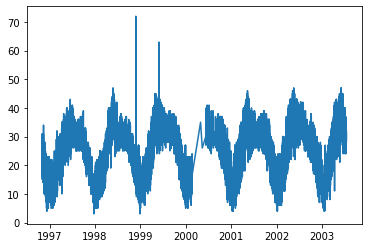

In [13]:
# Temprature over time
plt.plot(df['Date'], df['tempm'])
plt.show()

So visualization is looking nice without any break.

In [14]:
# Reseting Date and temprature column
data=df[['Date', 'tempm']]
data.dropna(inplace=True)
data.columns=['ds', 'y']
data.head()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



,ds,y
0,1996-11-01 11:00:00,30.0
1,1996-11-01 12:00:00,28.0
2,1996-11-01 13:00:00,24.0
3,1996-11-01 14:00:00,24.0
4,1996-11-01 16:00:00,23.0


In [15]:
data

,ds,y
0,1996-11-01 11:00:00,30.0
1,1996-11-01 12:00:00,28.0
2,1996-11-01 13:00:00,24.0
3,1996-11-01 14:00:00,24.0
4,1996-11-01 16:00:00,23.0
...,...,...
45677,2003-07-15 16:30:00,30.0
45678,2003-07-15 17:00:00,29.0
45679,2003-07-15 17:30:00,29.0
45680,2003-07-15 18:00:00,29.0


**Train Model**

In [17]:
m=NeuralProphet()
m.fit(data, freq="D", epochs=500)

INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64


  0%|          | 0/332 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.52E-02, min: 9.14E-01


  0%|          | 0/332 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.25E-02, min: 1.51E+00


  0%|          | 0/332 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.82E-02, min: 1.42E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.52E-02
Epoch[500/500]: 100%|██████████| 500/500 [15:06<00:00,  1.81s/it, SmoothL1Loss=0.00346, MAE=2.26, RMSE=2.89, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,RegLoss
0,1.252929,59.744262,69.439212,0.0
1,0.580244,34.666716,40.900973,0.0
2,0.163991,16.479410,19.773345,0.0
3,0.058512,9.647141,11.901097,0.0
4,0.037280,7.705636,9.507818,0.0
...,...,...,...,...
495,0.003459,2.260160,2.890337,0.0
496,0.003459,2.258842,2.889965,0.0
497,0.003458,2.259246,2.890702,0.0
498,0.003457,2.258983,2.890737,0.0


So we got 2.26 MAE and we can say model is trained well.

**Forecast Away**

In [24]:
future=m.make_future_dataframe(data, periods=5000)
forecast=m.predict(future)
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly,season_daily
0,2003-07-16 18:30:00,None,29.538038,NaN,26.028526,5.548126,0.053390,-2.092004
1,2003-07-17 18:30:00,None,29.341288,NaN,26.026873,5.496614,-0.090194,-2.092004
2,2003-07-18 18:30:00,None,29.350677,NaN,26.025219,5.449217,-0.031754,-2.092004
3,2003-07-19 18:30:00,None,29.489338,NaN,26.023563,5.405978,0.151799,-2.092004
4,2003-07-20 18:30:00,None,29.265442,NaN,26.021910,5.366916,-0.031379,-2.092004


In [25]:
future

,ds,y
0,2003-07-16 18:30:00,None
1,2003-07-17 18:30:00,None
2,2003-07-18 18:30:00,None
3,2003-07-19 18:30:00,None
4,2003-07-20 18:30:00,None
...,...,...
4995,2017-03-19 18:30:00,None
4996,2017-03-20 18:30:00,None
4997,2017-03-21 18:30:00,None
4998,2017-03-22 18:30:00,None


In [26]:
forecast.tail()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly,season_daily
4995,2017-03-19 18:30:00,None,13.896631,NaN,17.762945,-1.742932,-0.031379,-2.092004
4996,2017-03-20 18:30:00,None,14.108876,NaN,17.761292,-1.513707,-0.046705,-2.092004
4997,2017-03-21 18:30:00,None,14.381297,NaN,17.759636,-1.281179,-0.005157,-2.092004
4998,2017-03-22 18:30:00,None,14.673935,NaN,17.757982,-1.045434,0.053390,-2.092004
4999,2017-03-23 18:30:00,None,14.767538,NaN,17.756327,-0.806592,-0.090194,-2.092004


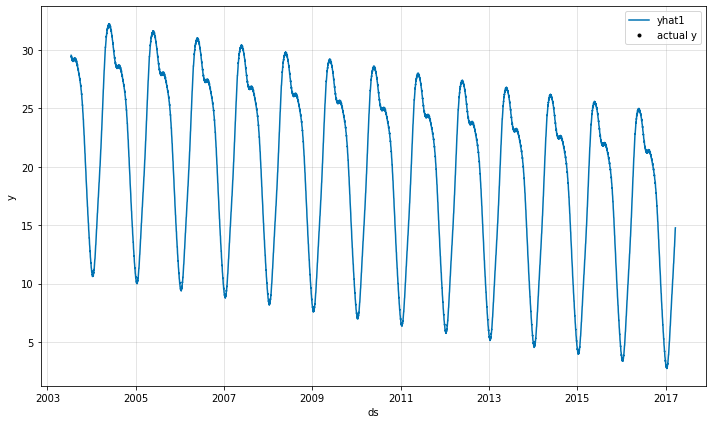

In [27]:
# Plotting the forecast
plot1=m.plot(forecast)

so this is the forecast through graph and its looking constantly decreasing.

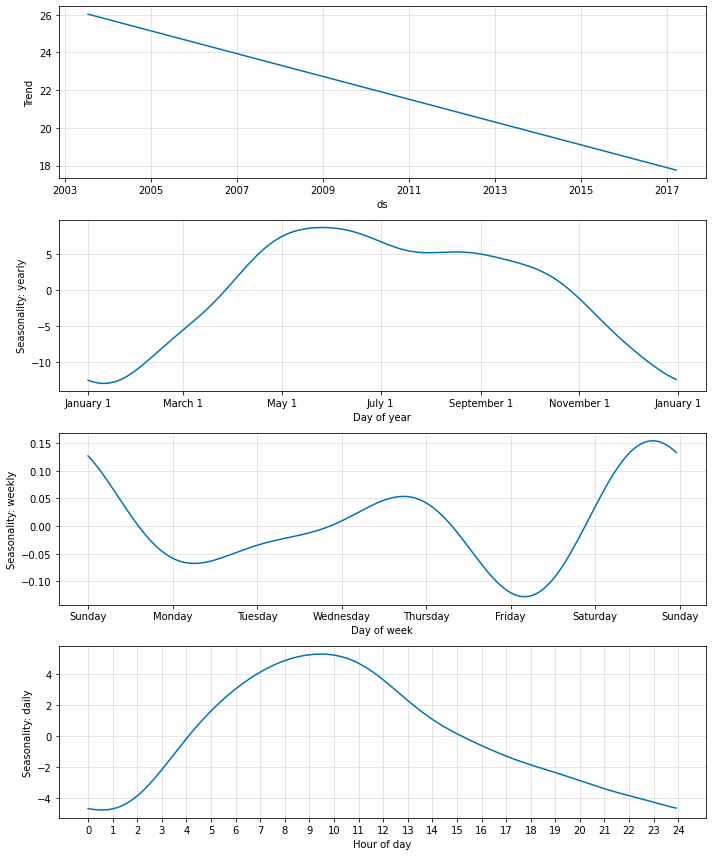

In [28]:
# plotting overall trend
plot2 =m.plot_components(forecast)

**Saving Model**

In [29]:
with open('forecast_model.pkl',"wb") as f:
  pickle.dump(m,f)

In [30]:
m